In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from scipy import stats

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_excel(datadir + 'Contribution/Annually/contribution_hours.xlsx',index_col=0)
obs_low_list  = ['obs_2014','obs_2015','obs_2016']
obs_high_list = ['obs_2019','obs_2021','obs_2022']
sim_low_list  = ['sim_2014','sim_2015','sim_2016']
sim_high_list = ['sim_2019','sim_2021','sim_2022']

In [6]:
# 定义数据列表
data_lists = {
    "obs_low": obs_low_list,
    "obs_high": obs_high_list,
    "sim_low": sim_low_list,
    "sim_high": sim_high_list,
}

results = {}

# 遍历数据列表和时间范围
for data_type, columns in data_lists.items():
    results[data_type] = df[columns].mean(axis=1)

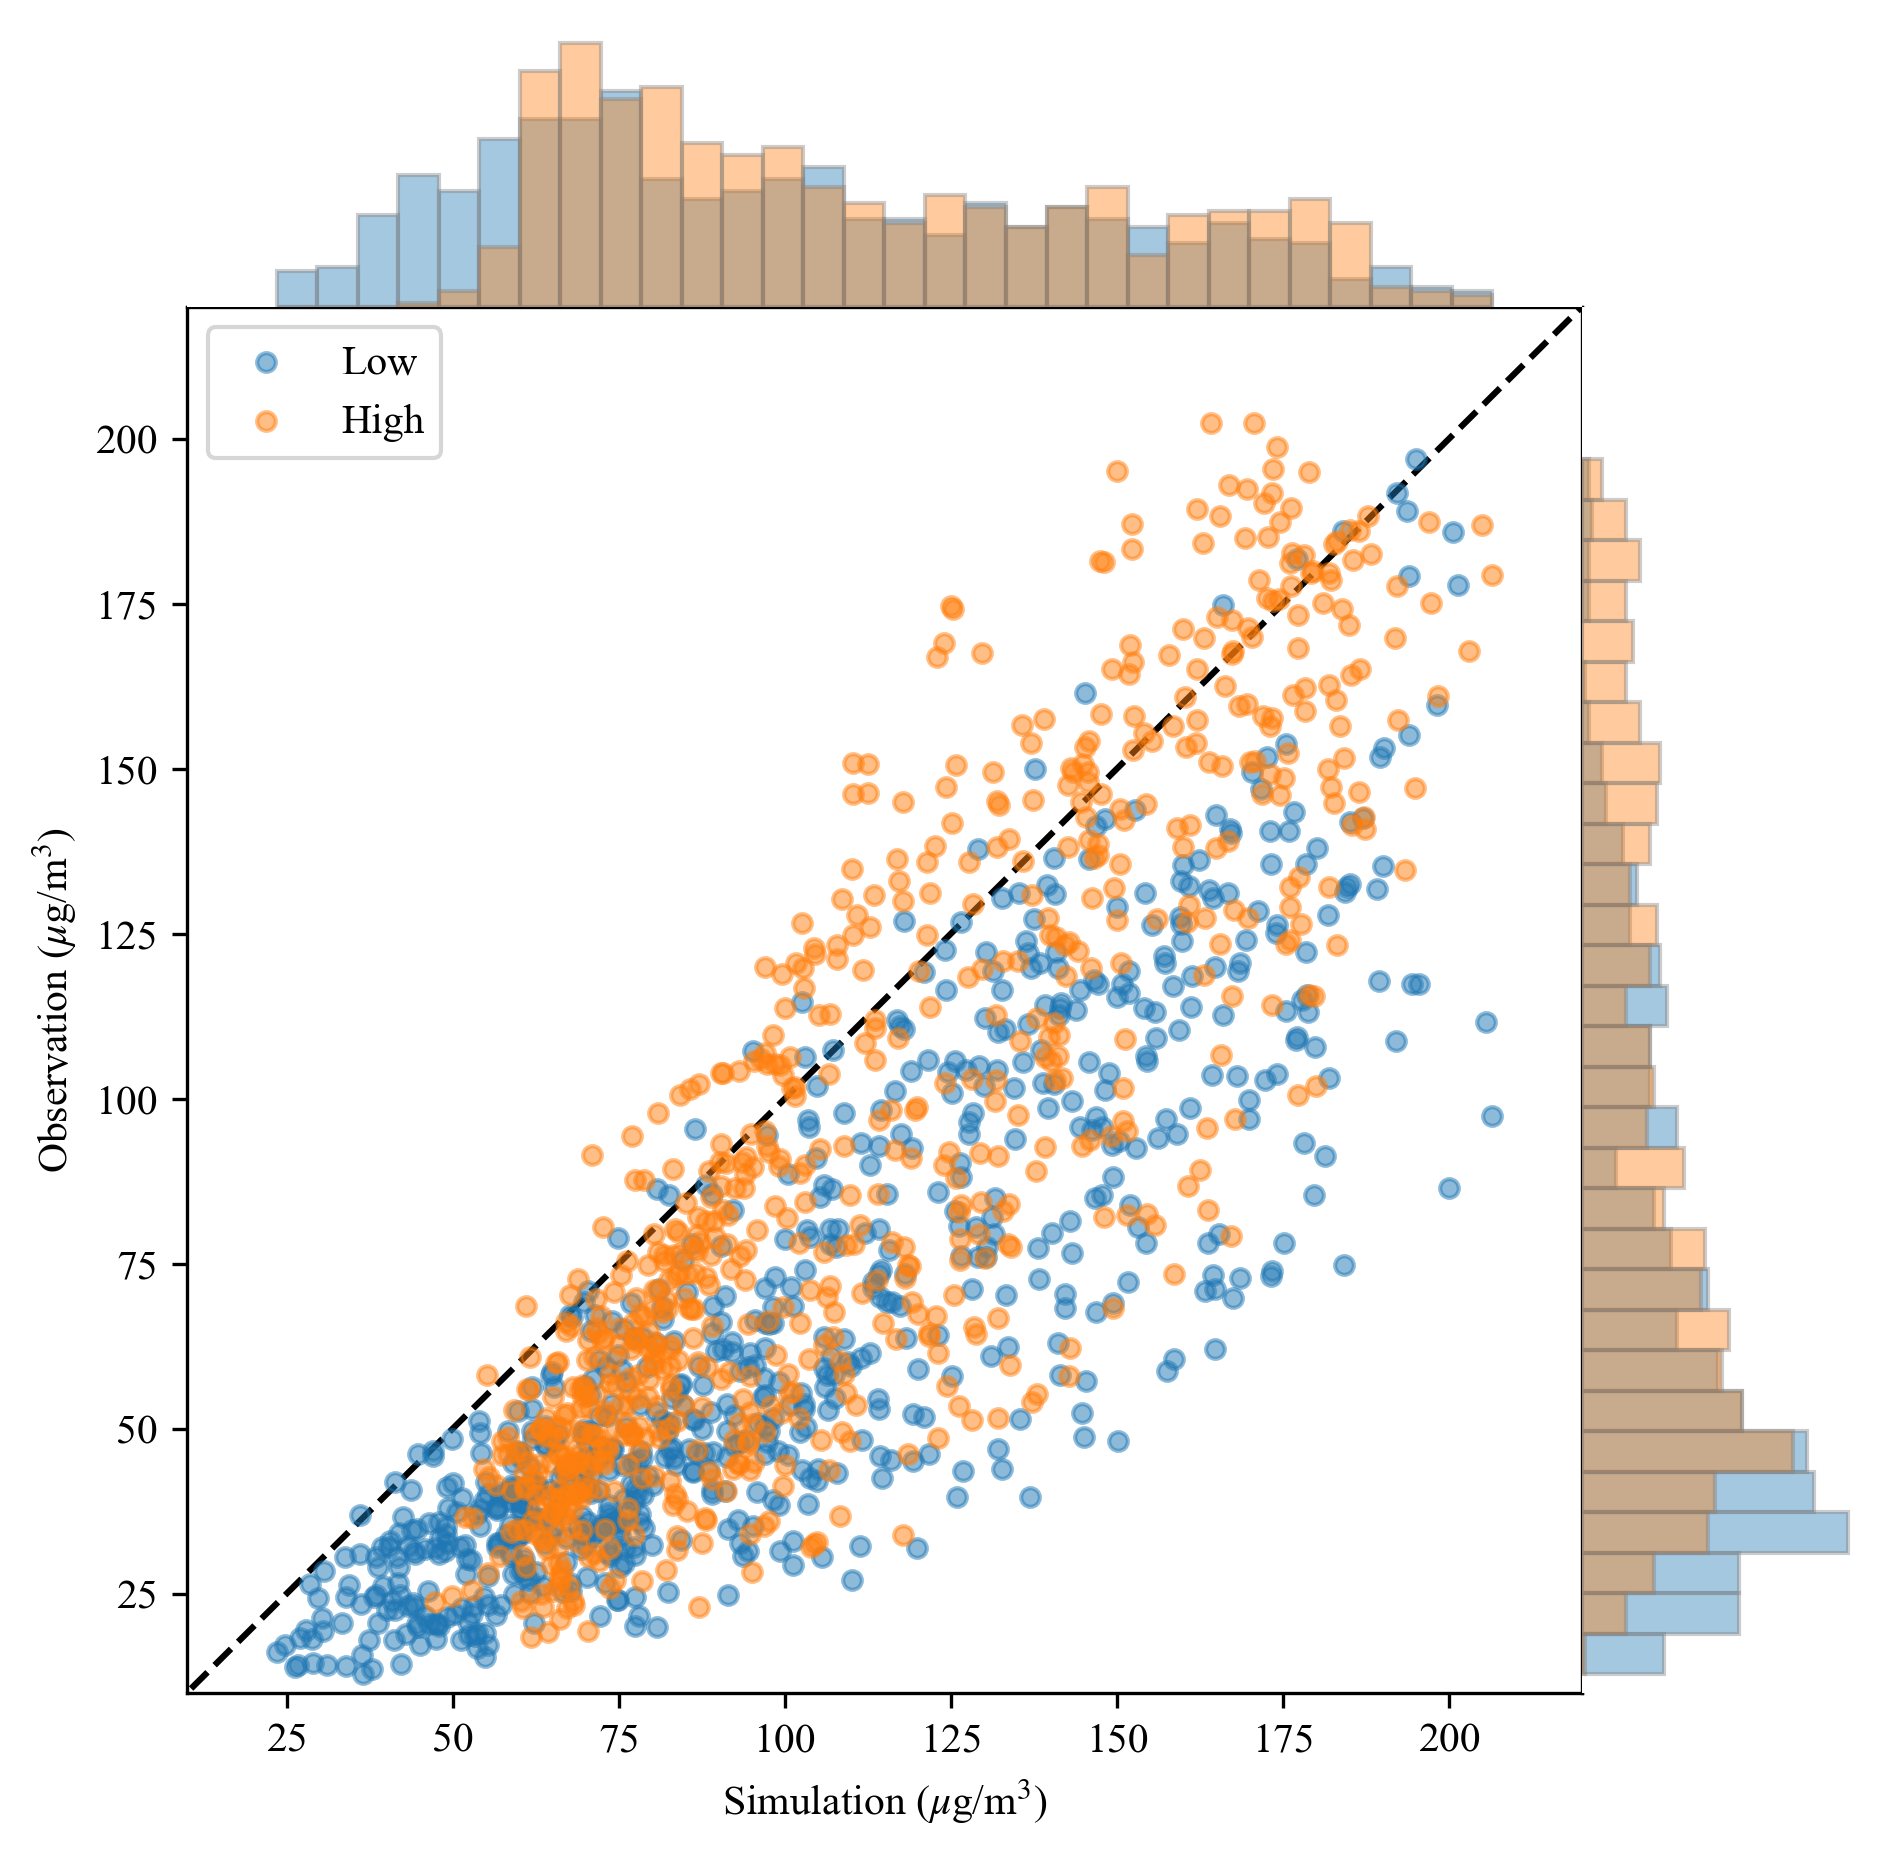

In [42]:
xmin = 10
xmax = 220

dotdict = dict(
    s=20, 
    marker='o',
    alpha=0.5,
)

fig = plt.figure(figsize=(6, 6),dpi=300)
ax = fig.add_subplot(111)
ax.scatter(results['sim_low'].values, results['obs_low'].values,
           label='Low',color='tab:blue',**dotdict)
ax.scatter(results['sim_high'].values, results['obs_high'].values,
           label='High',color='tab:orange',**dotdict)
ax.set_xlim(xmin,xmax)
ax.set_ylim(xmin,xmax)
ax.set_xlabel('Simulation ($\mu$g/m$^3$)')
ax.set_ylabel('Observation ($\mu$g/m$^3$)')
ax.legend()
ax.plot(np.arange(0,250),np.arange(0,250),'k--',zorder=0,label='1:1 Line')

ax_sub1 = fig.add_axes([ax.get_position().x0, ax.get_position().y1, ax.get_position().width, ax.get_position().height/5])
n1, bins1, patches1 = ax_sub1.hist(results['sim_low'], color='tab:blue', alpha=0.4,bins=30,edgecolor='gray')
ax_sub1.hist(results['sim_high'], color='tab:orange', alpha=0.4,bins=bins1,edgecolor='gray')
ax_sub1.set_xlim(xmin,xmax)

ax_sub2 = fig.add_axes([ax.get_position().x1, ax.get_position().y0, ax.get_position().width/5, ax.get_position().height])
n2, bins2, patches2 = ax_sub2.hist(results['obs_low'], color='tab:blue', alpha=0.4,bins=30,edgecolor='gray', orientation='horizontal')
ax_sub2.hist(results['obs_high'], color='tab:orange', alpha=0.4,bins=bins2,edgecolor='gray', orientation='horizontal')
ax_sub2.set_ylim(xmin,xmax)

for axe in [ax_sub1, ax_sub2]:
    axe.set_xticks([])
    axe.set_yticks([])
    axe.spines['top'].set_visible(False)
    axe.spines['right'].set_visible(False)
    axe.spines['bottom'].set_visible(False)
    axe.spines['left'].set_visible(False)

plt.show()

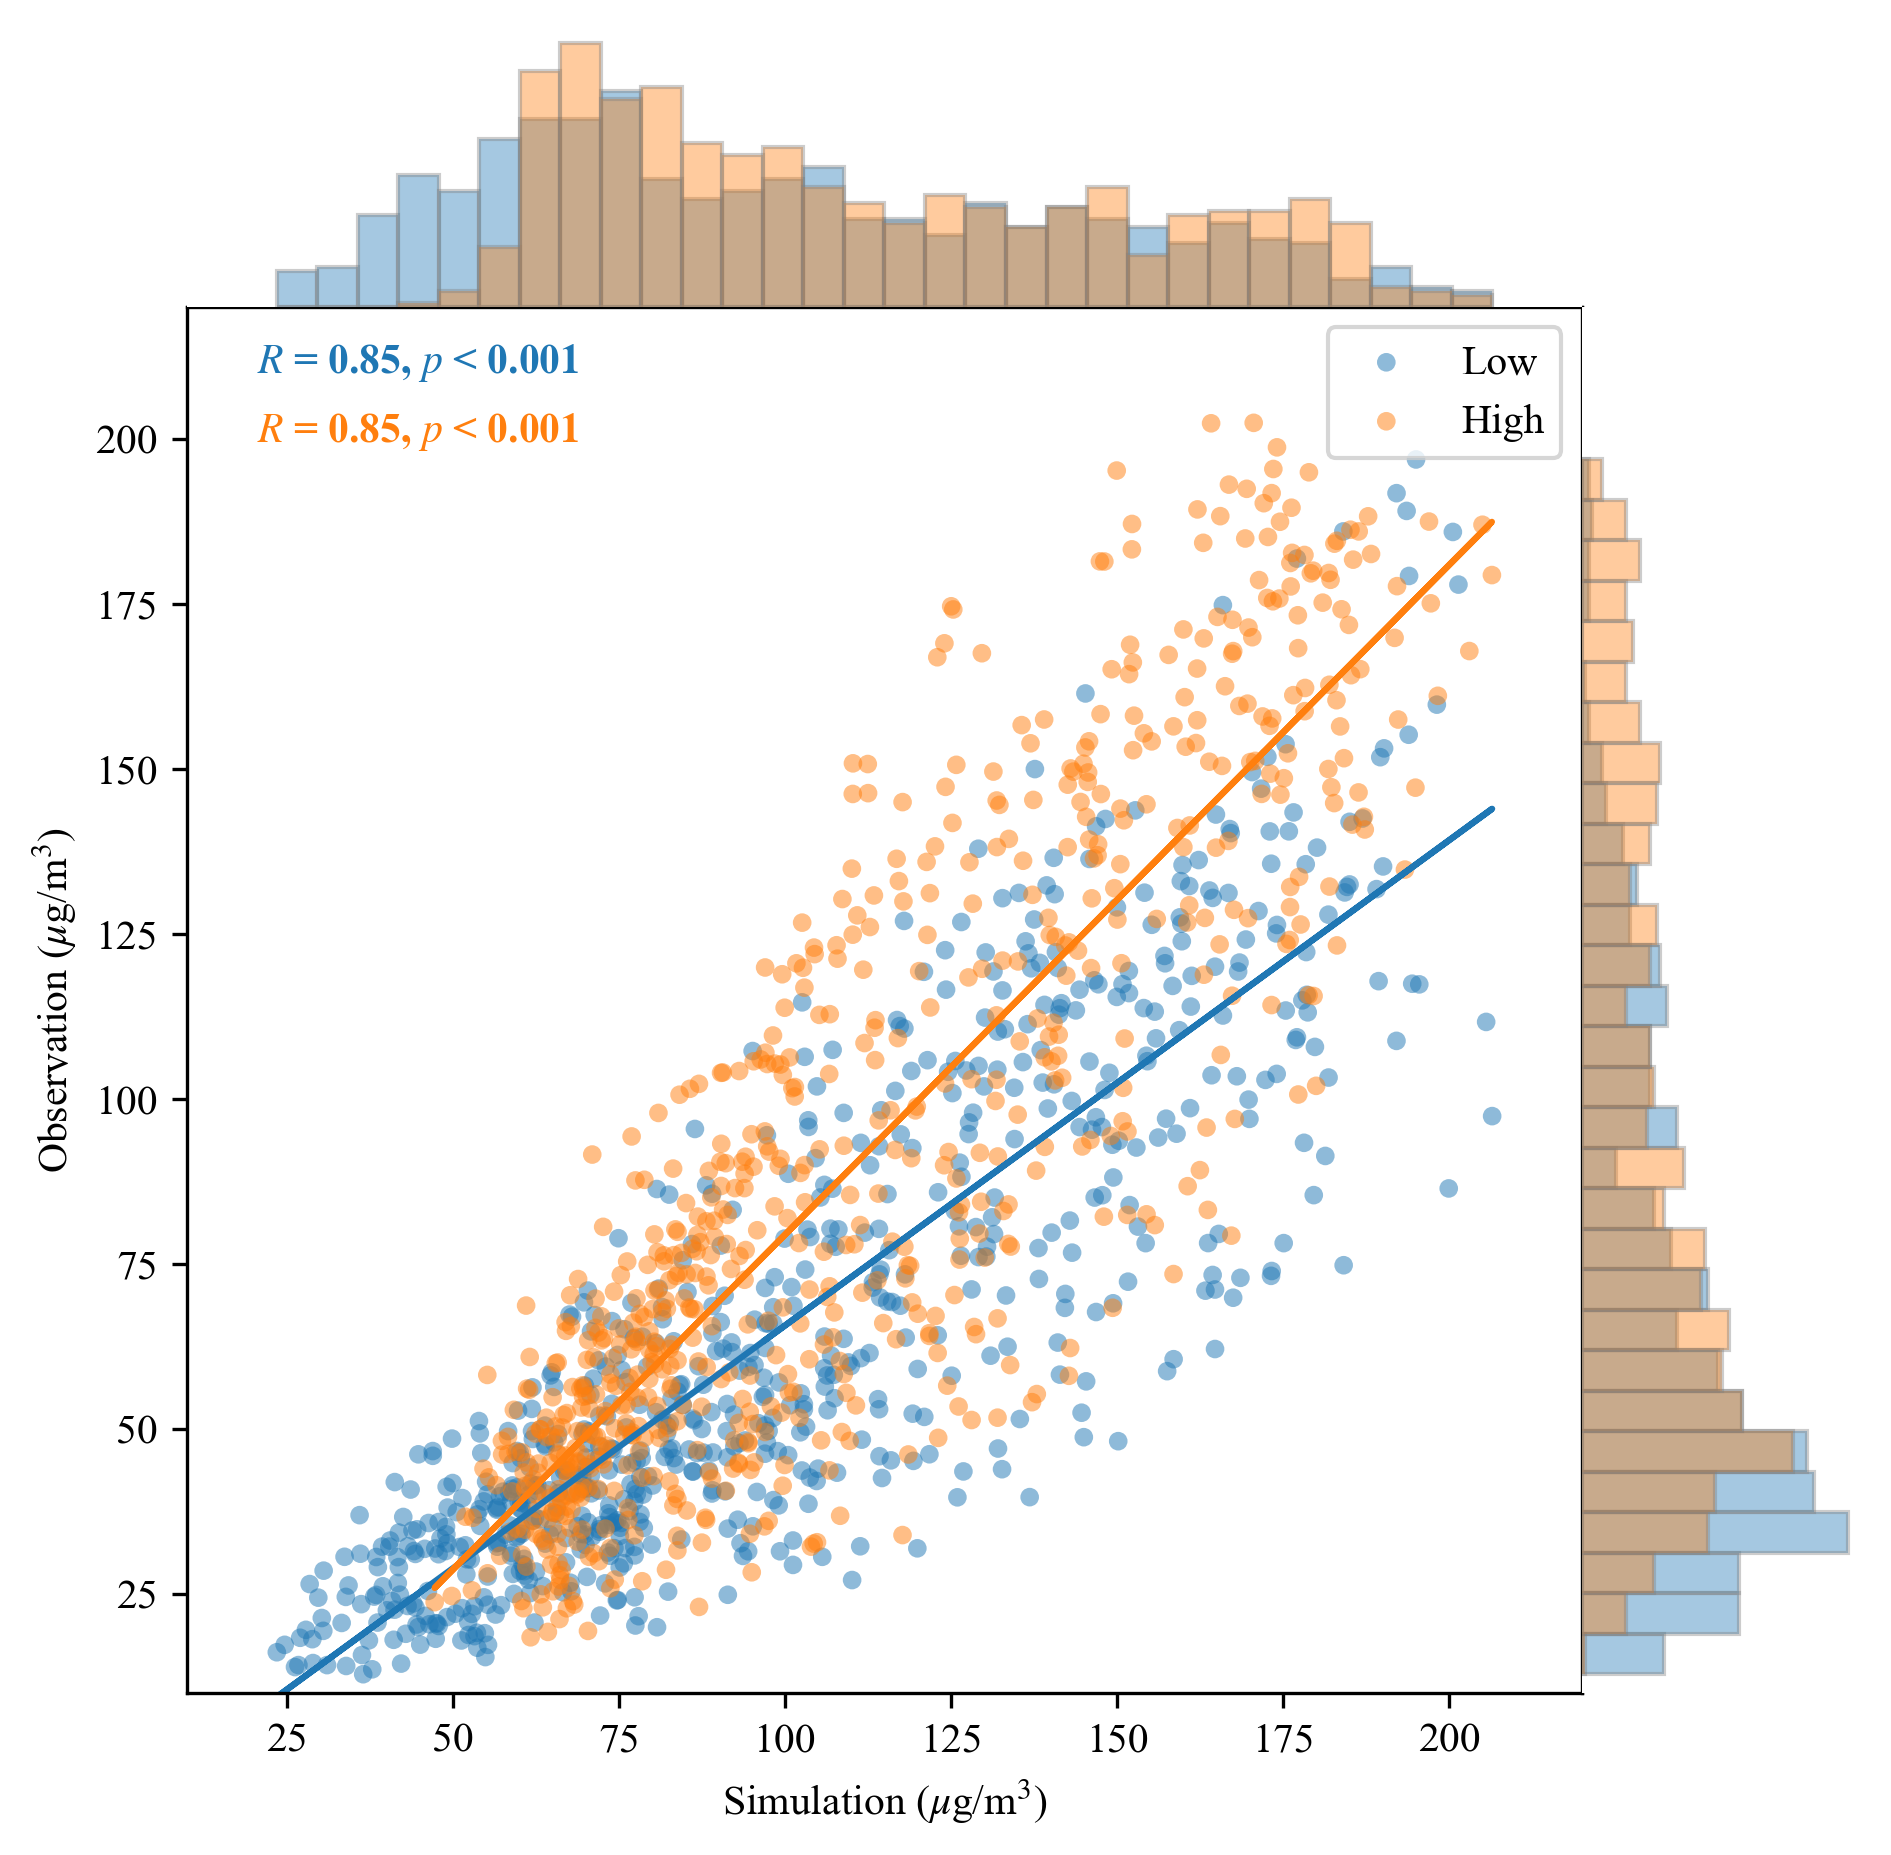

In [62]:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(results['sim_low'].values, results['obs_low'].values)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(results['sim_high'].values, results['obs_high'].values)

xmin = 10
xmax = 220

dotdict = dict(
    s=20, 
    marker='o',
    alpha=0.5,
    edgecolors='None'
)

fig = plt.figure(figsize=(6, 6),dpi=300)
ax = fig.add_subplot(111)
ax.scatter(results['sim_low'].values, results['obs_low'].values,
           label='Low',color='tab:blue',**dotdict)
ax.scatter(results['sim_high'].values, results['obs_high'].values,
           label='High',color='tab:orange',**dotdict)
ax.set_xlim(xmin,xmax)
ax.set_ylim(xmin,xmax)
ax.set_xlabel('Simulation ($\mu$g/m$^3$)')
ax.set_ylabel('Observation ($\mu$g/m$^3$)')
ax.legend()
# ax.plot(np.arange(0,250),np.arange(0,250),'k--',zorder=0,label='1:1 Line')

x1 = results['sim_low']
x2 = results['sim_high']
ax.plot(x1, slope1 * x1 + intercept1, color='tab:blue', label='Low')
ax.plot(x2, slope2 * x2 + intercept2, color='tab:orange', label='High')

ax.text(0.05,0.96,f'$R$ = {r_value1:.2f}, $p$ < 0.001',color='tab:blue',
        fontweight='bold',ha='left',va='center',transform=ax.transAxes)
ax.text(0.05,0.91,f'$R$ = {r_value2:.2f}, $p$ < 0.001',color='tab:orange',
        fontweight='bold',ha='left',va='center',transform=ax.transAxes)

# histograms
ax_sub1 = fig.add_axes([ax.get_position().x0, ax.get_position().y1, 
                        ax.get_position().width, ax.get_position().height/5])
n1, bins1, patches1 = ax_sub1.hist(results['sim_low'], color='tab:blue',
                                   alpha=0.4,bins=30,edgecolor='gray')
ax_sub1.hist(results['sim_high'], color='tab:orange', alpha=0.4,bins=bins1,edgecolor='gray')
ax_sub1.set_xlim(xmin,xmax)

ax_sub2 = fig.add_axes([ax.get_position().x1, ax.get_position().y0, 
                        ax.get_position().width/5, ax.get_position().height])
n2, bins2, patches2 = ax_sub2.hist(results['obs_low'], color='tab:blue',
                                   alpha=0.4,bins=30,edgecolor='gray', orientation='horizontal')
ax_sub2.hist(results['obs_high'], color='tab:orange', alpha=0.4,bins=bins2,edgecolor='gray', orientation='horizontal')
ax_sub2.set_ylim(xmin,xmax)

for axe in [ax_sub1, ax_sub2]:
    axe.set_xticks([])
    axe.set_yticks([])
    axe.spines['top'].set_visible(False)
    axe.spines['right'].set_visible(False)
    axe.spines['bottom'].set_visible(False)
    axe.spines['left'].set_visible(False)

plt.show()

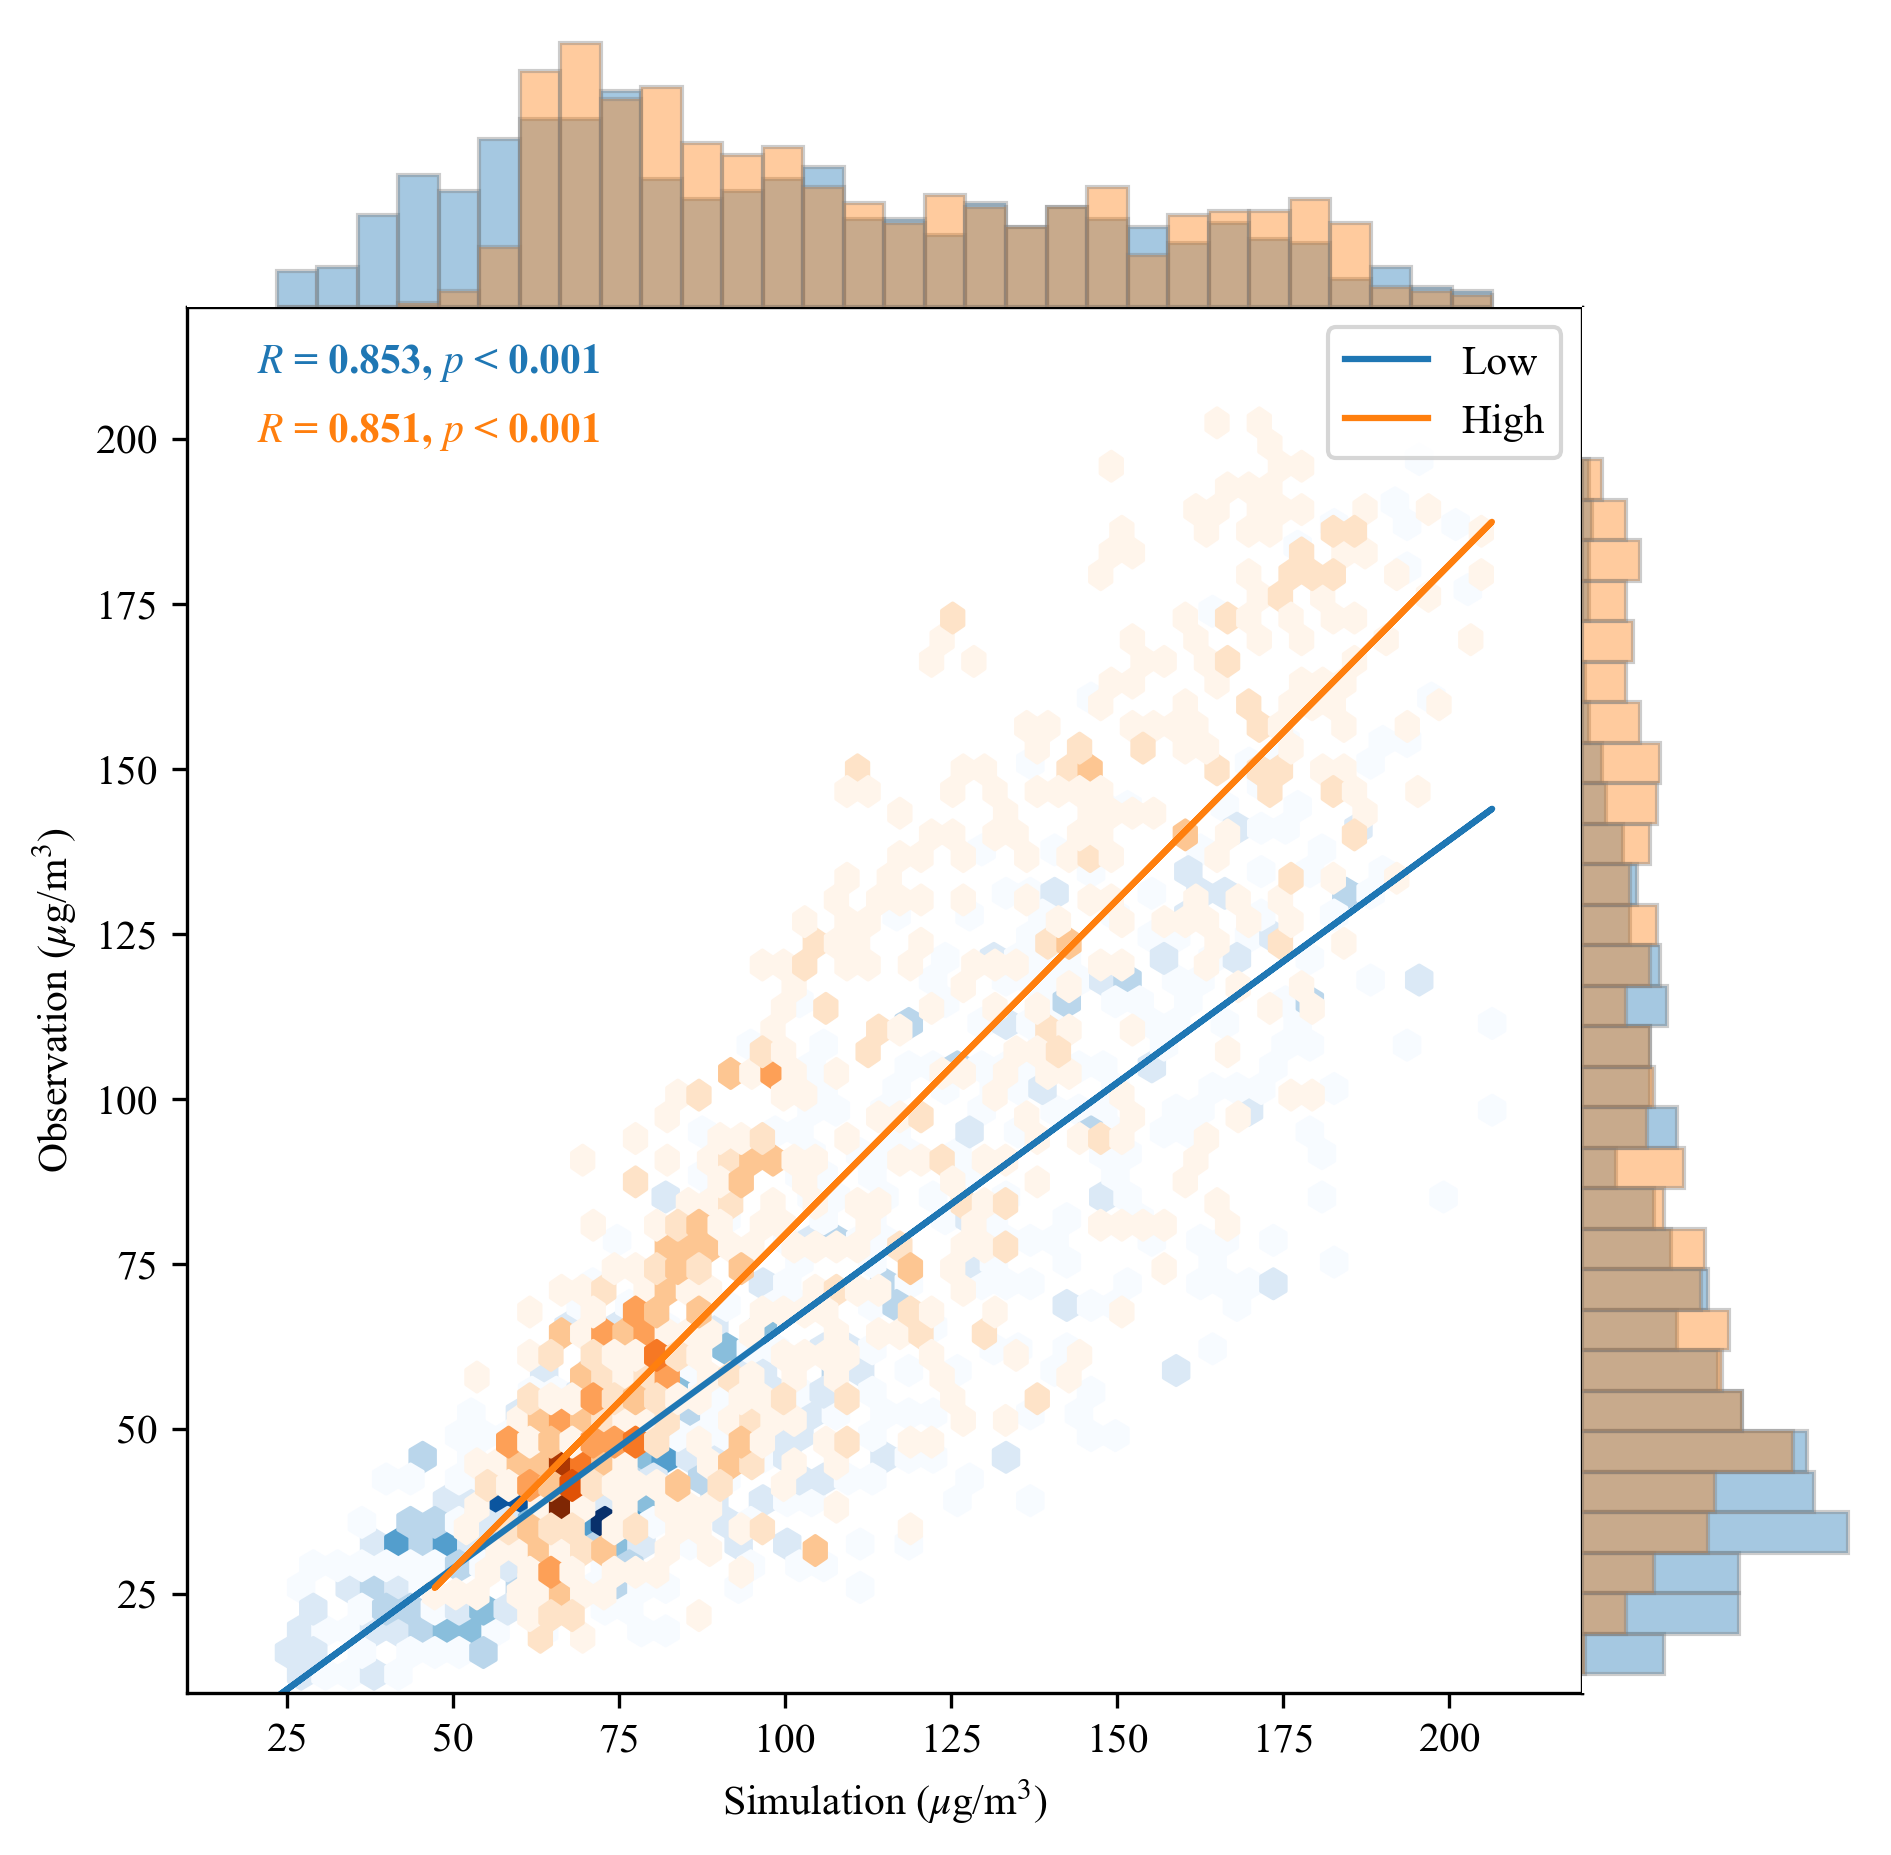

In [78]:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(results['sim_low'].values, results['obs_low'].values)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(results['sim_high'].values, results['obs_high'].values)

xmin = 10
xmax = 220

dotdict = dict(
    s=20, 
    marker='o',
    alpha=0.5,
    edgecolors='None'
)

fig = plt.figure(figsize=(6, 6), dpi=300)

# 创建主图
ax = fig.add_subplot(111)
hb1 = ax.hexbin(results['sim_low'], results['obs_low'], gridsize=50, cmap='Blues', mincnt=1)
hb2 = ax.hexbin(results['sim_high'], results['obs_high'], gridsize=50, cmap='Oranges', mincnt=1)
ax.set_xlim(xmin, xmax)
ax.set_ylim(xmin, xmax)
ax.set_xlabel('Simulation ($\mu$g/m$^3$)')
ax.set_ylabel('Observation ($\mu$g/m$^3$)')

# 添加回归线
ax.plot(x1, slope1 * x1 + intercept1, color='tab:blue', label='Low')
ax.plot(x2, slope2 * x2 + intercept2, color='tab:orange', label='High')
ax.legend()

# 显示相关系数和 p 值
ax.text(0.05, 0.96, f'$R$ = {r_value1:.3f}, $p$ < 0.001', color='tab:blue', fontweight='bold', ha='left', va='center', transform=ax.transAxes)
ax.text(0.05, 0.91, f'$R$ = {r_value2:.3f}, $p$ < 0.001', color='tab:orange', fontweight='bold', ha='left', va='center', transform=ax.transAxes)

# 创建侧边的直方图
ax_sub1 = fig.add_axes([ax.get_position().x0, ax.get_position().y1, 
                        ax.get_position().width, ax.get_position().height/5])
n1, bins1, patches1 = ax_sub1.hist(results['sim_low'], color='tab:blue', alpha=0.4, bins=30, edgecolor='gray')
ax_sub1.hist(results['sim_high'], color='tab:orange', alpha=0.4, bins=bins1, edgecolor='gray')
ax_sub1.set_xlim(xmin, xmax)

ax_sub2 = fig.add_axes([ax.get_position().x1, ax.get_position().y0, 
                        ax.get_position().width/5, ax.get_position().height])
n2, bins2, patches2 = ax_sub2.hist(results['obs_low'], color='tab:blue', alpha=0.4, bins=30, edgecolor='gray', orientation='horizontal')
ax_sub2.hist(results['obs_high'], color='tab:orange', alpha=0.4, bins=bins2, edgecolor='gray', orientation='horizontal')
ax_sub2.set_ylim(xmin, xmax)
for axe in [ax_sub1, ax_sub2]:
    axe.set_xticks([])
    axe.set_yticks([])
    axe.spines['top'].set_visible(False)
    axe.spines['right'].set_visible(False)
    axe.spines['bottom'].set_visible(False)
    axe.spines['left'].set_visible(False)

plt.show()
